In [1]:
import pandas as pd
import numpy as np

In [96]:
gong = pd.read_csv('공영충전소.csv',encoding='cp949')
ap = pd.read_csv('아파트충전소.csv',encoding='cp949')

In [98]:
gong

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1111051500,청운효자동,2497.710553,2685.081041,105.000000,0
1,1111053000,사직동,198.094578,194.208363,41.362069,1
2,1111054000,삼청동,1156.550649,1048.723601,306.500000,1
3,1111055000,부암동,1817.767620,2176.322142,40.000000,0
4,1111056000,평창동,665.649830,801.681645,12.428571,1
...,...,...,...,...,...,...
391,1174065000,성내제2동,433.334990,495.090408,60.117647,1
392,1174066000,성내제3동,664.116647,690.599588,134.833333,1
393,1174068500,길동,514.664059,593.863128,65.666667,1
394,1174069000,둔촌제1동,362.570837,339.262948,0.000000,1


In [99]:
gong[list(gong.columns)[2:5]]

,충당남1020,충당여1020,충당점포
0,2497.710553,2685.081041,105.000000
1,198.094578,194.208363,41.362069
2,1156.550649,1048.723601,306.500000
3,1817.767620,2176.322142,40.000000
4,665.649830,801.681645,12.428571
...,...,...,...
391,433.334990,495.090408,60.117647
392,664.116647,690.599588,134.833333
393,514.664059,593.863128,65.666667
394,362.570837,339.262948,0.000000


In [100]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

In [101]:
cluster = linkage(gong[list(gong.columns)[2:5]],method='average')

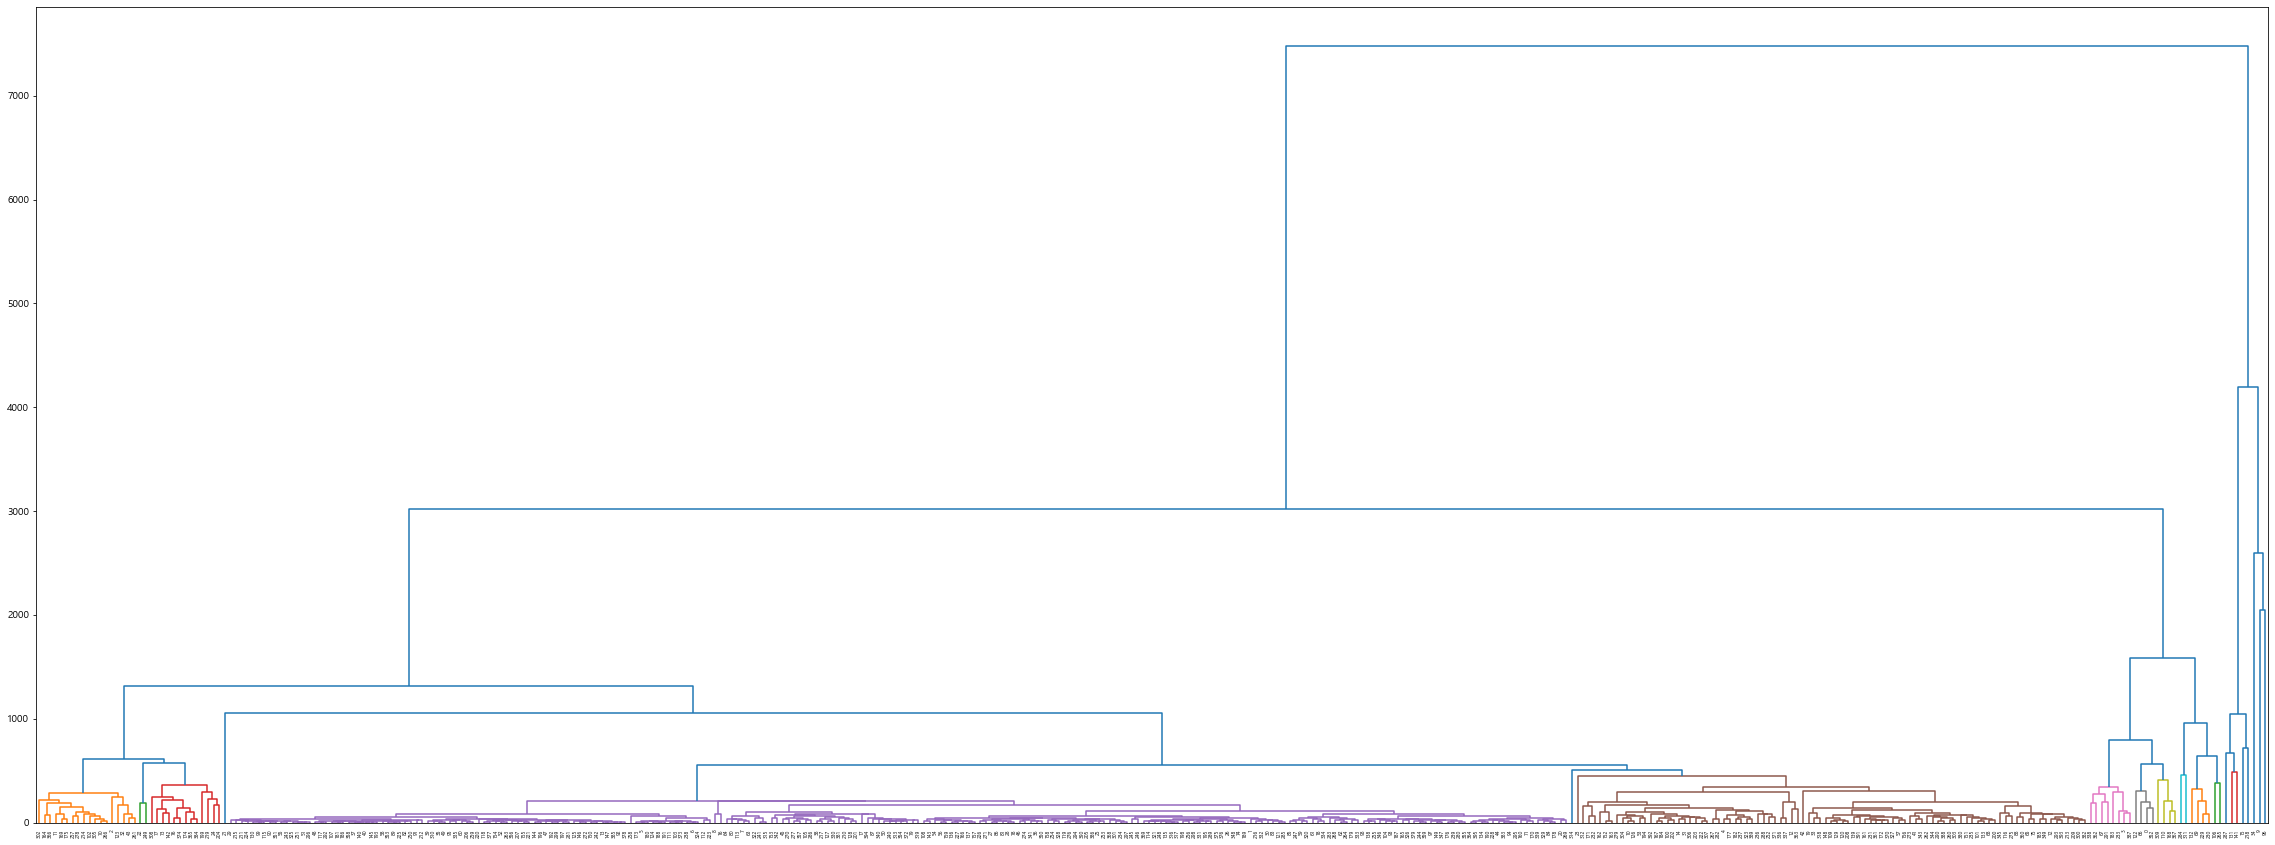

In [102]:
plt.figure(figsize=(40,15))
dent = shc.dendrogram(cluster, show_leaf_counts=True, color_threshold=500)

In [17]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=12, linkage='average') 
pred = cluster.fit_predict(gong[list(gong.columns)[2:5]])

In [18]:
gong['cluster'] = pred

In [19]:
gong

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1111051500,청운효자동,2497.710553,2685.081041,105.000000,4
1,1111053000,사직동,198.094578,194.208363,41.362069,6
2,1111054000,삼청동,1156.550649,1048.723601,306.500000,3
3,1111055000,부암동,1817.767620,2176.322142,40.000000,5
4,1111056000,평창동,665.649830,801.681645,12.428571,6
...,...,...,...,...,...,...
391,1174065000,성내제2동,433.334990,495.090408,60.117647,6
392,1174066000,성내제3동,664.116647,690.599588,134.833333,6
393,1174068500,길동,514.664059,593.863128,65.666667,6
394,1174069000,둔촌제1동,362.570837,339.262948,0.000000,6


In [20]:
gong.groupby('cluster').mean()

,행정동코드,충당남1020,충당여1020,충당점포
cluster,,,,
0,1.129066e+09,4400.113263,4500.029512,638.000000
1,1.140562e+09,4507.116712,5348.442675,313.333333
2,1.138815e+09,3127.710154,3593.305857,246.833333
3,1.140429e+09,1211.956601,1285.071962,146.546736
4,1.141252e+09,2312.134659,2572.212111,259.031250
5,1.149497e+09,1808.136027,2021.998680,210.839931
6,1.143621e+09,319.295956,345.103466,34.449012
7,1.126056e+09,7613.541867,8572.691508,1281.000000
8,1.114059e+09,608.721263,530.870102,992.777778


In [25]:
gong[gong['cluster']==8]

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
21,1114059000,광희동,608.721263,530.870102,992.777778,8


In [21]:
gong.groupby('cluster').count()

,행정동코드,행정동,충당남1020,충당여1020,충당점포
cluster,,,,,
0,2,2,2,2,2
1,3,3,3,3,3
2,6,6,6,6,6
3,33,33,33,33,33
4,8,8,8,8,8
5,8,8,8,8,8
6,330,330,330,330,330
7,1,1,1,1,1
8,1,1,1,1,1


In [24]:
gong.sort_values(by='충당점포',ascending=False)

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
9,1111063000,종로5.6가동,8733.358796,7150.862082,2236.000000,11
96,1126056500,면목본동,7613.541867,8572.691508,1281.000000,7
21,1114059000,광희동,608.721263,530.870102,992.777778,8
15,1111071000,숭인제2동,4670.319153,4583.018872,856.000000,0
34,1117055500,청파동,6237.065698,6832.689230,765.000000,9
...,...,...,...,...,...,...
153,1135061900,중계본동,282.222923,401.582977,0.000000,6
162,1135070000,상계8동,649.177107,938.691422,0.000000,6
236,1150060400,가양제2동,766.226241,837.847380,0.000000,6
163,1135071000,상계9동,608.900323,851.937036,0.000000,6


In [30]:
ap[list(ap.columns)[2:4]]

,충당거주인구,담당
0,6017.500000,95.000000
1,161.655172,7.344828
2,1242.000000,17.500000
3,4839.500000,93.500000
4,2596.714286,66.428571
...,...,...
397,1407.647059,18.235294
398,1945.250000,25.833333
399,1702.296296,23.962963
400,26.800000,38.200000


In [103]:
cluster = linkage(ap[list(ap.columns)[2:4]],method='average')

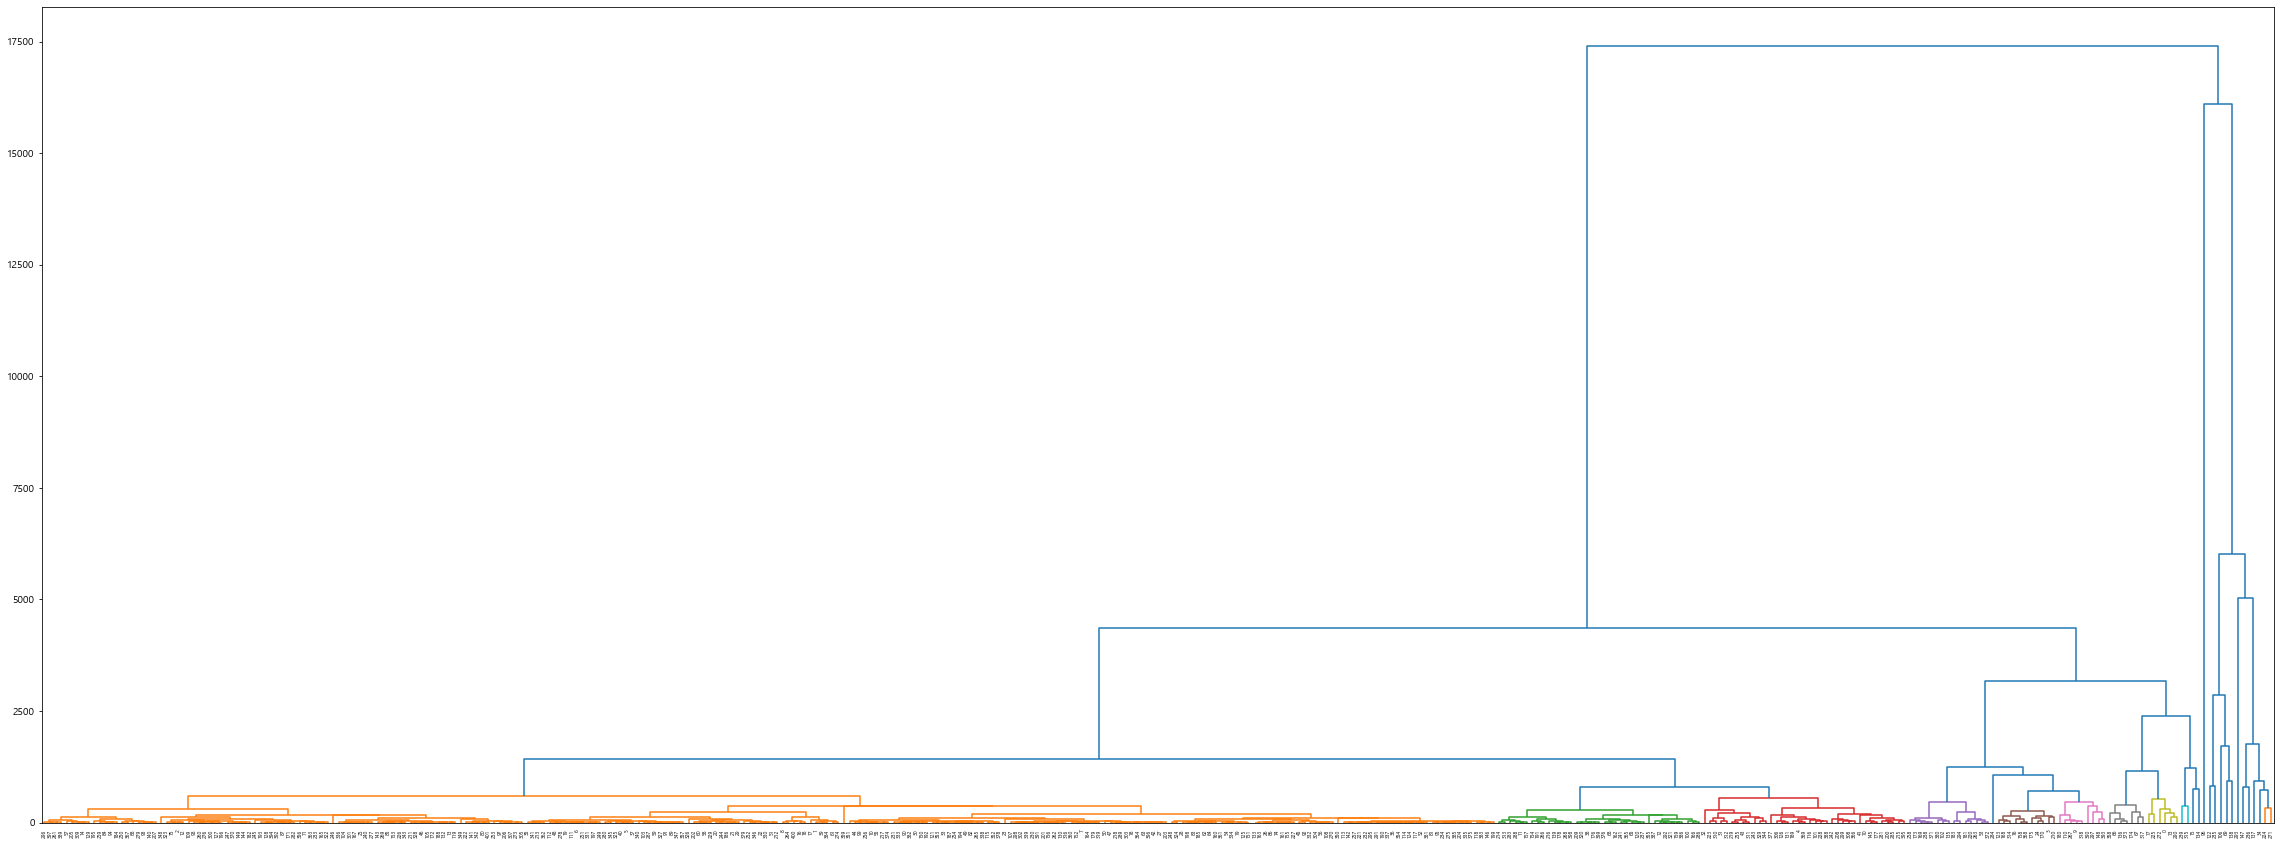

In [105]:
plt.figure(figsize=(40,15))
dent = shc.dendrogram(cluster, show_leaf_counts=True, color_threshold=600)

In [35]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, linkage='average') 
pred = cluster.fit_predict(ap[list(ap.columns)[2:4]])

In [36]:
ap['cluster'] = pred

In [39]:
ap.groupby('cluster').mean()

,행정동코드,충당거주인구,담당
cluster,,,
0,1.126070e+09,15469.166667,128.000000
1,1.138439e+09,9407.437500,85.125000
2,1.143147e+09,1068.700698,22.341043
3,1.140606e+09,7026.102564,105.083333
4,1.141061e+09,18457.500000,254.000000
5,1.126056e+09,33943.000000,194.000000
6,1.144106e+09,4422.166005,90.888657
7,1.139565e+09,12601.000000,93.000000
8,1.137313e+09,20194.250000,365.500000


In [40]:
ap.groupby('cluster').count()

,행정동코드,행정동,충당거주인구,담당
cluster,,,,
0,3,3,3,3
1,4,4,4,4
2,336,336,336,336
3,13,13,13,13
4,2,2,2,2
5,1,1,1,1
6,36,36,36,36
7,2,2,2,2
8,4,4,4,4


In [41]:
ap

,행정동코드,행정동,충당거주인구,담당,cluster
0,1111051500,청운효자동,6017.500000,95.000000,3
1,1111053000,사직동,161.655172,7.344828,2
2,1111054000,삼청동,1242.000000,17.500000,2
3,1111055000,부암동,4839.500000,93.500000,6
4,1111056000,평창동,2596.714286,66.428571,2
...,...,...,...,...,...
397,1174065000,성내2동,1407.647059,18.235294,2
398,1174066000,성내3동,1945.250000,25.833333,2
399,1174068500,길동,1702.296296,23.962963,2
400,1174069000,둔촌1동,26.800000,38.200000,2


In [45]:
gong.groupby('cluster').mean()

,행정동코드,충당남1020,충당여1020,충당점포
cluster,,,,
0,1.129066e+09,4400.113263,4500.029512,638.000000
1,1.140562e+09,4507.116712,5348.442675,313.333333
2,1.138815e+09,3127.710154,3593.305857,246.833333
3,1.140429e+09,1211.956601,1285.071962,146.546736
4,1.141252e+09,2312.134659,2572.212111,259.031250
5,1.149497e+09,1808.136027,2021.998680,210.839931
6,1.143621e+09,319.295956,345.103466,34.449012
7,1.126056e+09,7613.541867,8572.691508,1281.000000
8,1.114059e+09,608.721263,530.870102,992.777778


In [46]:
gong.groupby('cluster').count()

,행정동코드,행정동,충당남1020,충당여1020,충당점포
cluster,,,,,
0,2,2,2,2,2
1,3,3,3,3,3
2,6,6,6,6,6
3,33,33,33,33,33
4,8,8,8,8,8
5,8,8,8,8,8
6,330,330,330,330,330
7,1,1,1,1,1
8,1,1,1,1,1


In [52]:
a = gong[gong['cluster'] == 11]
b = gong[gong['cluster'] == 7]
c = gong[gong['cluster'] == 9]
d = gong[gong['cluster'] == 0]
e = gong[gong['cluster'] == 1]
f = gong[gong['cluster'] == 10]
g = gong[gong['cluster'] == 2]
h = gong[gong['cluster'] == 4]
i = gong[gong['cluster'] == 3]
j = gong[gong['cluster'] == 5]
k = gong[gong['cluster'] == 6]
l = gong[gong['cluster'] == 8]

In [54]:
gongneed = pd.concat([a,b,c,d,e,f,g,h]).reset_index(drop=True)

In [55]:
gong1 = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l]).reset_index(drop=True)

In [63]:
gong1.head(10)

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1111063000,종로5.6가동,8733.358796,7150.862082,2236.0,11
1,1126056500,면목본동,7613.541867,8572.691508,1281.0,7
2,1117055500,청파동,6237.065698,6832.689230,765.0,9
3,1111071000,숭인제2동,4670.319153,4583.018872,856.0,0
4,1147061100,신월7동,4129.907374,4417.040151,420.0,0
5,1130564500,우이동,4818.844689,5302.801212,125.0,1
6,1132067000,쌍문제2동,4338.841899,5344.520763,108.0,1
7,1159055000,상도제3동,4363.663548,5398.006050,707.0,1
8,1159052000,노량진제2동,3121.724171,2591.320075,116.0,10
9,1162069500,신림동,3289.543807,2815.731933,476.0,10


In [68]:
len(gong1)

396

In [69]:
a = [11]
b = 11
for i in range(395):
    if gong1['cluster'][i] == gong1['cluster'][i+1]:
        a.append(b)
    else:
        b = b-1
        a.append(b)

In [70]:
a

[11,
 10,
 9,
 8,
 8,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

In [71]:
gong1['cluster'] = a

In [72]:
gong1

,행정동코드,행정동,충당남1020,충당여1020,충당점포,cluster
0,1111063000,종로5.6가동,8733.358796,7150.862082,2236.000000,11
1,1126056500,면목본동,7613.541867,8572.691508,1281.000000,10
2,1117055500,청파동,6237.065698,6832.689230,765.000000,9
3,1111071000,숭인제2동,4670.319153,4583.018872,856.000000,8
4,1147061100,신월7동,4129.907374,4417.040151,420.000000,8
...,...,...,...,...,...,...
391,1174066000,성내제3동,664.116647,690.599588,134.833333,1
392,1174068500,길동,514.664059,593.863128,65.666667,1
393,1174069000,둔촌제1동,362.570837,339.262948,0.000000,1
394,1174070000,둔촌제2동,298.708558,345.522699,13.347826,1


In [79]:
gongneed = gong1[:24]

### 11,7,9,0,1,10,2,4

### 3,5,6,8
8은 설명

In [47]:
ap.groupby('cluster').mean()

,행정동코드,충당거주인구,담당
cluster,,,
0,1.126070e+09,15469.166667,128.000000
1,1.138439e+09,9407.437500,85.125000
2,1.143147e+09,1068.700698,22.341043
3,1.140606e+09,7026.102564,105.083333
4,1.141061e+09,18457.500000,254.000000
5,1.126056e+09,33943.000000,194.000000
6,1.144106e+09,4422.166005,90.888657
7,1.139565e+09,12601.000000,93.000000
8,1.137313e+09,20194.250000,365.500000


In [48]:
ap.groupby('cluster').count()

,행정동코드,행정동,충당거주인구,담당
cluster,,,,
0,3,3,3,3
1,4,4,4,4
2,336,336,336,336
3,13,13,13,13
4,2,2,2,2
5,1,1,1,1
6,36,36,36,36
7,2,2,2,2
8,4,4,4,4


### 9,8,4,5,0

In [80]:
a = ap[ap['cluster'] == 9]
b = ap[ap['cluster'] == 8]
c = ap[ap['cluster'] == 4]
d = ap[ap['cluster'] == 5]
e = ap[ap['cluster'] == 0]
f = ap[ap['cluster'] == 1]
g = ap[ap['cluster'] == 2]
h = ap[ap['cluster'] == 3]
i = ap[ap['cluster'] == 7]
j = ap[ap['cluster'] == 6]

In [83]:
ap = pd.concat([a,b,c,d,e,f,g,h,i,j]).reset_index(drop=True)

In [87]:
ap.head(10)

,행정동코드,행정동,충당거주인구,담당,cluster
0,1159055000,상도3동,24643.0,522.0,9
1,1117055500,청파동,19568.0,153.0,8
2,1130564500,우이동,20631.0,885.0,8
3,1147061100,신월7동,20122.0,193.0,8
4,1154570000,시흥4동,20456.0,231.0,8
5,1132067000,쌍문2동,18841.0,160.0,4
6,1150055000,화곡2동,18074.0,348.0,4
7,1126056500,면목본동,33943.0,194.0,5
8,1121577000,중곡4동,14436.5,84.5,0
9,1126066000,망우3동,16613.0,202.0,0


In [85]:
a = [9]
b = 9
for i in range(401):
    if ap['cluster'][i] == ap['cluster'][i+1]:
        a.append(b)
    else:
        b = b-1
        a.append(b)

In [86]:
a

[9,
 8,
 8,
 8,
 8,
 7,
 7,
 6,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [88]:
ap['cluster'] = a

In [91]:
apneed = ap[:11]

In [92]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt
%matplotlib inline

0.12.1


In [94]:
gong1.to_csv('공충.csv',index=False,encoding='cp949')
gongneed.to_csv('공충필.csv',index=False,encoding='cp949')
ap.to_csv('아충.csv',index=False,encoding='cp949')
apneed.to_csv('아충필.csv',index=False,encoding='cp949')